In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('sample_data/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
import math
N = math.sqrt(768)
k = N/2
print(k)

13.856406460551018


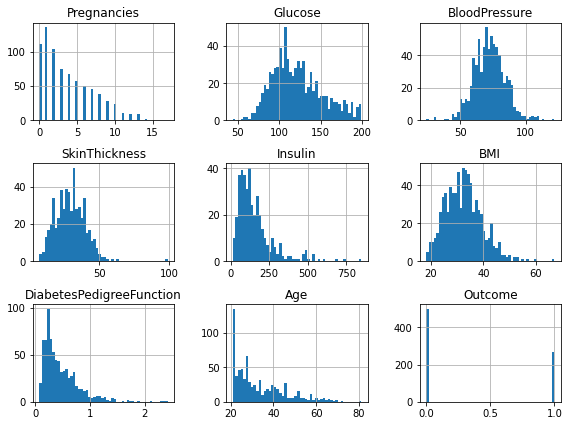

In [4]:
col_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for c in col_missing:
    dataset[c] = dataset[c].replace(to_replace=0, value=np.NaN)
dataset.hist(bins=50, figsize = (8.0, 6.0))
plt.tight_layout(True)
plt.show()

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [7]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.NaN, strategy='median')
X_train = impute.fit_transform(X_train)
X_test = impute.fit_transform(X_test)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

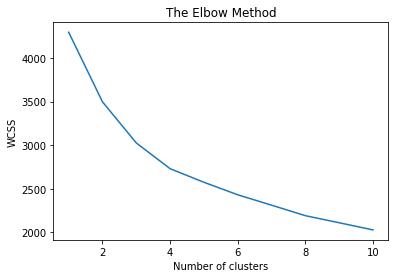

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_test)


In [11]:
u_labels = np.unique(y_kmeans)
print(u_labels)

[0 1]


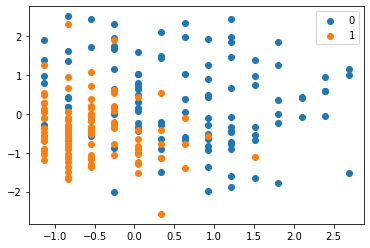

In [12]:
for i in u_labels:
    plt.scatter(X_test[y_kmeans == i , 0] , X_test[y_kmeans == i , 1] , label = i)
plt.legend()
plt.show()

In [13]:
centroids = kmeans.cluster_centers_

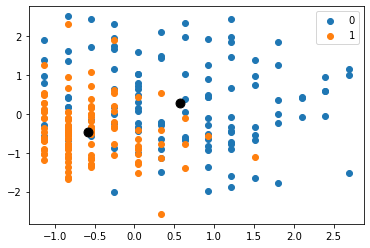

In [14]:
for i in u_labels:
    plt.scatter(X_test[y_kmeans == i , 0] , X_test[y_kmeans == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [15]:
print(y_kmeans)

[0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1
 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1
 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1
 0 0 0 0 0 0 1 1 0]


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_kmeans)
print(cm)
accuracy_score(y_test, y_kmeans)

[[ 56 101]
 [ 59  15]]


0.30735930735930733

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_kmeans))

              precision    recall  f1-score   support

           0       0.49      0.36      0.41       157
           1       0.13      0.20      0.16        74

    accuracy                           0.31       231
   macro avg       0.31      0.28      0.28       231
weighted avg       0.37      0.31      0.33       231



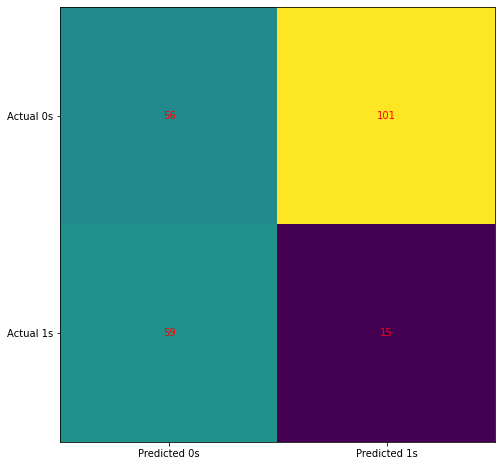

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [19]:
kmeans.score(X_test, y_kmeans)

-1353.5424802726334

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_kmeans)

0.2796953003959374

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_kmeans)

0.2796953003959374